# WHITE WINE MODEL

1️⃣ IMPORT LIBRARIES

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Advanced models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

2️⃣ LOAD WHITE WINE DATASET

In [56]:
data = pd.read_csv("winequality-white.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


 3️⃣ CONVERT QUALITY INTO CATEGORIES

In [57]:
def categorize_quality(q):
    if q <= 5:
        return 'Low'
    elif q == 6:
        return 'Medium'
    else:
        return 'High'

data['quality_label'] = data['quality'].apply(categorize_quality)

4️⃣ FEATURES & TARGET

In [58]:
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) 

5️⃣ TRAIN TEST SPLIT

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4665            7.3              0.17         0.36            8.20      0.028   
1943            6.3              0.25         0.44           11.60      0.041   
3399            5.6              0.32         0.33            7.40      0.037   
843             6.9              0.19         0.35            1.70      0.036   
2580            7.7              0.30         0.26           18.95      0.053   
...             ...               ...          ...             ...        ...   
4426            6.2              0.21         0.52            6.50      0.047   
466             7.0              0.14         0.32            9.00      0.039   
3092            7.6              0.27         0.52            3.20      0.043   
3772            6.3              0.24         0.29           13.70      0.035   
860             8.1              0.27         0.35            1.70      0.030   

      free sulfur dioxide  

 6️⃣ FEATURE SCALING

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.51511931, -1.07623315,  0.22773076, ..., -0.32826101,
        -0.70244474,  1.54037099],
       [-0.66918809, -0.28877673,  0.89583195, ..., -0.06188569,
         0.26607415, -0.82171197],
       [-1.49820327,  0.40024764, -0.02280718, ...,  0.40427112,
         0.00193263,  0.48150622],
       ...,
       [ 0.87041153, -0.09191263,  1.56393313, ..., -1.12738698,
         0.35412132,  0.72585963],
       [-0.66918809, -0.38720878, -0.35685777, ..., -0.12847952,
        -0.96658625,  0.07425053],
       [ 1.46256523, -0.09191263,  0.14421812, ...,  0.20448963,
         1.23459303, -0.08865174]], shape=(3918, 11))

7️⃣ MODEL TRAINING

In [61]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(eval_metric="mlogloss", verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# LightGBM
lgb_model = LGBMClassifier(verbose=-1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)


8️⃣ EVALUATION REPORT

In [62]:
models = {
    "1)Random Forest": rf_pred,
    "2)Gradient Boosting": gb_pred,
    "3)XGBoost": xgb_pred,
    "4)LightGBM": lgb_pred,
    "5)CatBoost": cat_pred
}

for name, pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred, target_names=["Low","Medium","High"]))




1)Random Forest
Accuracy: 0.7326530612244898
Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.67      0.74       227
      Medium       0.76      0.73      0.74       321
        High       0.68      0.76      0.72       432

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.74      0.73      0.73       980


2)Gradient Boosting
Accuracy: 0.6142857142857143
Classification Report:
               precision    recall  f1-score   support

         Low       0.67      0.49      0.56       227
      Medium       0.65      0.63      0.64       321
        High       0.57      0.67      0.62       432

    accuracy                           0.61       980
   macro avg       0.63      0.60      0.61       980
weighted avg       0.62      0.61      0.61       980


3)XGBoost
Accuracy: 0.7244897959183674
Classification Report:
               precision    rec

9️⃣ ACCURACY COMPARISON PLOT(WHITE WINE)

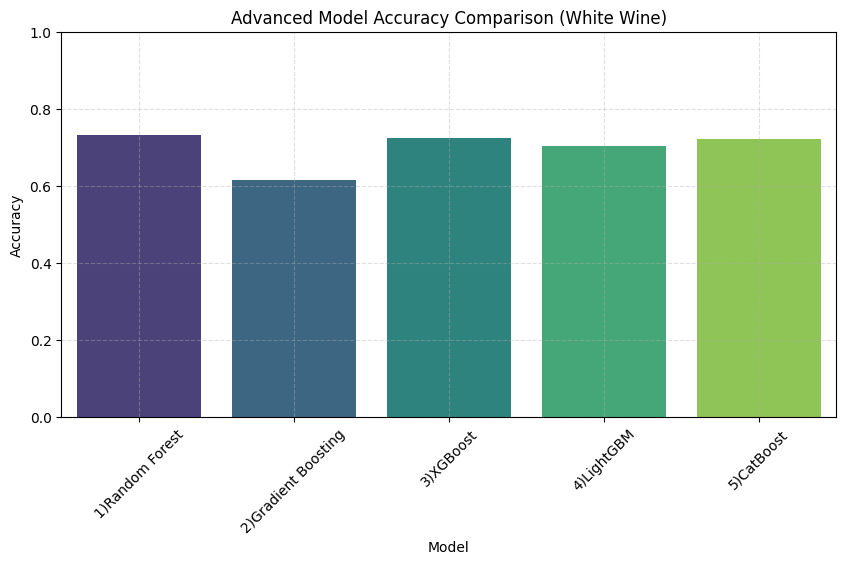

In [63]:
acc_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_score(y_test, pred) for pred in models.values()]
})

plt.figure(figsize=(10,5))
sns.barplot(data=acc_df, x="Model", y="Accuracy", hue="Model",
            palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.title("Advanced Model Accuracy Comparison (White Wine)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


🔟 CONFUSION MATRICES(WHITE WINE)

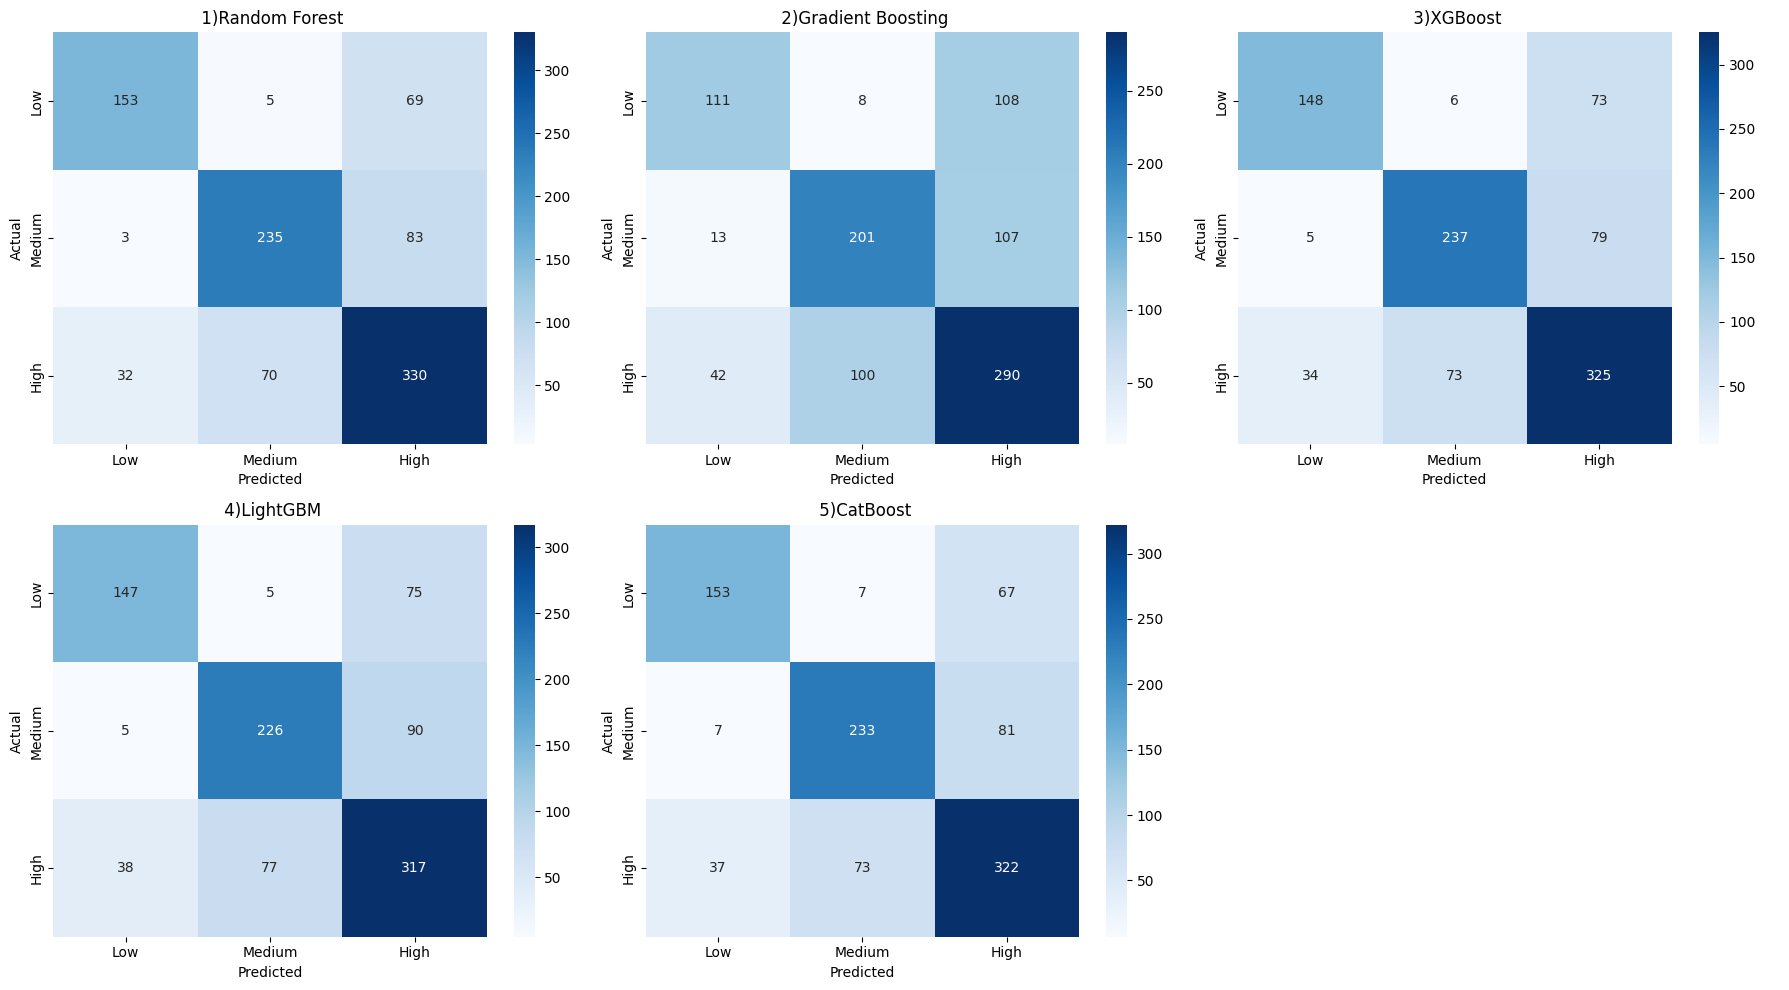

In [70]:
titles = list(models.keys())
preds = list(models.values())   # rf_pred, gb_pred, xgb_pred, lgb_pred, cat_pred

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for i in range(len(preds)):
    cm = confusion_matrix(y_test, preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=['Low','Medium','High'],
                yticklabels=['Low','Medium','High'], ax=axes[i])
    axes[i].set_title(f" {titles[i]}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

axes[5].axis("off")
plt.tight_layout()
plt.show()



1️⃣1️⃣ FEATURE IMPORTANCE (DECISION TREE-WHITE WINE)

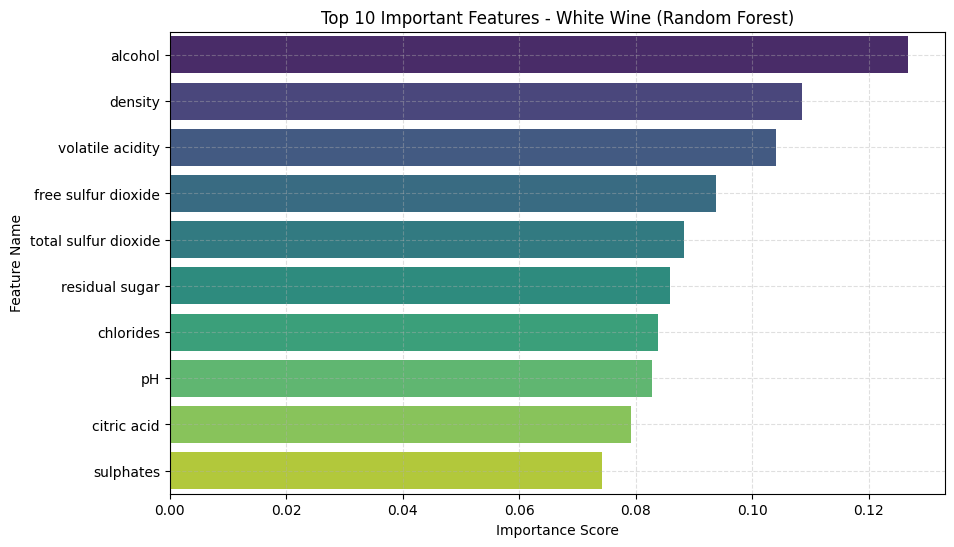

In [74]:
# Feature importance from Random Forest (White Wine)
importances = rf_model.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=feat_imp_df,
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Important Features - White Wine (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


# RED WINE MODEL

 1️⃣ Load Red Wine Dataset

In [75]:
red_data = pd.read_csv("winequality-red.csv", sep=';')
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2️⃣ Convert Quality to Categories

In [76]:
def categorize_quality(q):
    if q <= 5:
        return 'Low'
    elif q == 6:
        return 'Medium'
    else:
        return 'High'

red_data['quality_label'] = red_data['quality'].apply(categorize_quality)



3️⃣ Features & Target

In [77]:
Xr = red_data.drop(['quality', 'quality_label'], axis=1)
yr = red_data['quality_label']
le_r = LabelEncoder()
yr = le_r.fit_transform(red_data["quality_label"]) 

4️⃣ Train Test Split

In [78]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42, stratify=yr)


5️⃣ Feature Scaling

In [79]:
scaler_r = StandardScaler()
Xr_train_scaled = scaler_r.fit_transform(Xr_train)
Xr_test_scaled = scaler_r.transform(Xr_test)
Xr_train_scaled

array([[-0.07631279,  0.94000183, -0.20720762, ..., -0.77628196,
         0.21620414, -0.96257089],
       [-1.0546554 , -1.04338394, -0.00220391, ..., -0.64783062,
        -0.58053416,  1.47874645],
       [ 0.0963359 , -1.37394824,  1.48407297, ..., -0.06979959,
         0.50075354,  0.07029414],
       ...,
       [ 1.36242633, -0.71281965,  0.51030536, ..., -1.22586165,
        -0.06834525,  0.72757189],
       [-0.99710583,  0.94000183, -0.97597152, ...,  0.82935978,
        -0.4667144 , -0.21139632],
       [ 0.90202981, -0.98828989,  1.43282204, ..., -0.32670227,
         0.72839305,  0.16419096]], shape=(1279, 11))

6️⃣ Train Models

In [80]:
# Random Forest
rf_r = RandomForestClassifier(n_estimators=300, random_state=42)
rf_r.fit(Xr_train, yr_train)
rf_r_pred = rf_r.predict(Xr_test)

# Gradient Boosting
gb_r = GradientBoostingClassifier()
gb_r.fit(Xr_train, yr_train)
gb_r_pred = gb_r.predict(Xr_test)

# XGBoost
xgb_r = XGBClassifier(eval_metric="mlogloss", verbosity=0)
xgb_r.fit(Xr_train, yr_train)
xgb_r_pred = xgb_r.predict(Xr_test)

# LightGBM
lgb_r = LGBMClassifier(verbose=-1)
lgb_r.fit(Xr_train, yr_train)
lgb_r_pred = lgb_r.predict(Xr_test)

# CatBoost
cat_r = CatBoostClassifier(verbose=0)
cat_r.fit(Xr_train, yr_train)
cat_r_pred = cat_r.predict(Xr_test)


7️⃣ Evaluation

In [81]:
models_r = {
    "1)Random Forest": rf_r_pred,
    "2)Gradient Boosting": gb_r_pred,
    "3)XGBoost": xgb_r_pred,
    "4)LightGBM": lgb_r_pred,
    "5)CatBoost": cat_r_pred
}

for name, pred in models_r.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(yr_test, pred))
    print("Classification Report:\n", 
          classification_report(yr_test, pred, target_names=["Low","Medium","High"]))



1)Random Forest
Accuracy: 0.76875
Classification Report:
               precision    recall  f1-score   support

         Low       0.71      0.63      0.67        43
      Medium       0.81      0.84      0.83       149
        High       0.73      0.73      0.73       128

    accuracy                           0.77       320
   macro avg       0.75      0.73      0.74       320
weighted avg       0.77      0.77      0.77       320


2)Gradient Boosting
Accuracy: 0.68125
Classification Report:
               precision    recall  f1-score   support

         Low       0.62      0.53      0.57        43
      Medium       0.73      0.80      0.76       149
        High       0.63      0.59      0.61       128

    accuracy                           0.68       320
   macro avg       0.66      0.64      0.65       320
weighted avg       0.68      0.68      0.68       320


3)XGBoost
Accuracy: 0.74375
Classification Report:
               precision    recall  f1-score   support

        

8️⃣ACCURACY COMPARISON BAR PLOT (RED WINE)

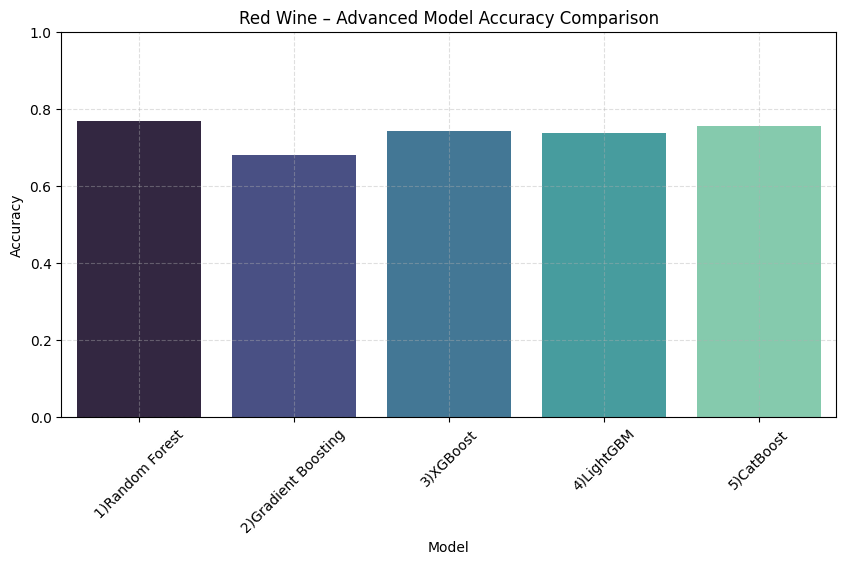

In [82]:
acc_r_df = pd.DataFrame({
    "Model": list(models_r.keys()),
    "Accuracy": [accuracy_score(yr_test, pred) for pred in models_r.values()]
})

plt.figure(figsize=(10,5))
sns.barplot(data=acc_r_df, x="Model", y="Accuracy", hue="Model",
            palette="mako", legend=False)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.title("Red Wine – Advanced Model Accuracy Comparison")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()



9️⃣CONFUSION MATRICES (RED WINE)

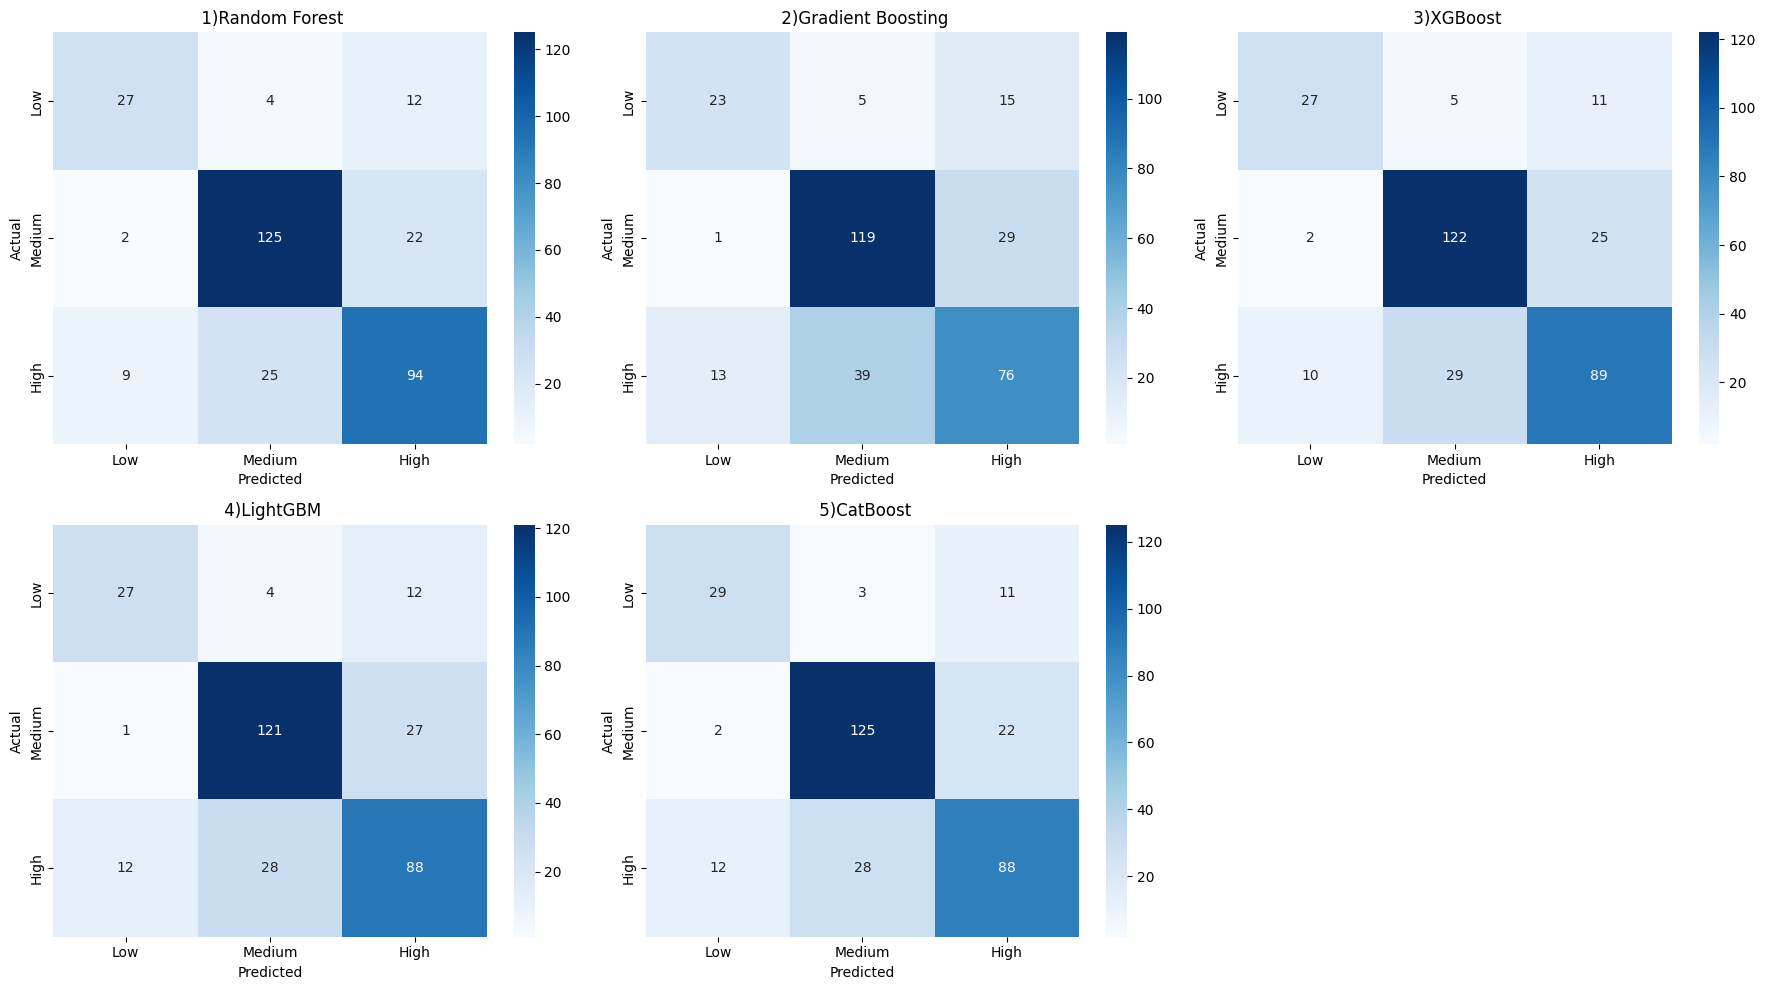

In [85]:
labels = ["Low", "Medium", "High"]

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

titles = list(models_r.keys())
preds = list(models_r.values())

for i in range(len(titles)):
    cm = confusion_matrix(yr_test, preds[i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(f" {titles[i]}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# turn off last empty subplot
axes[5].axis("off")

plt.tight_layout()
plt.show()



🔟FEATURE IMPORTANCE (DECISION TREE - RED WINE)

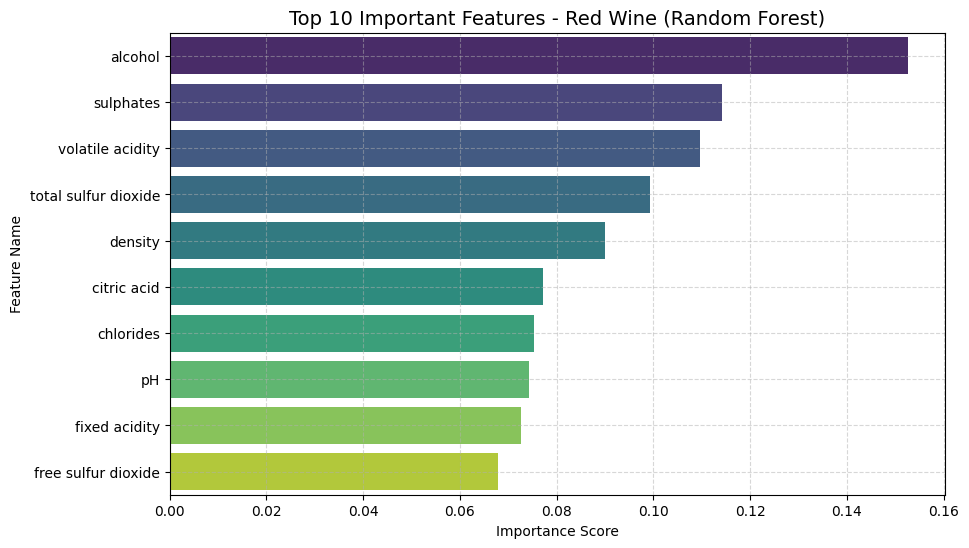

In [87]:
# Feature importance from Random Forest (Red Wine)
red_importances = rf_r.feature_importances_
red_features = Xr.columns

red_feat_imp_df = pd.DataFrame({
    "Feature": red_features,
    "Importance": red_importances
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=red_feat_imp_df,
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)

plt.title("Top 10 Important Features - Red Wine (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# WHITE vs RED — BEST MODEL ACCURACY COMPARISON PLOT

In [36]:
combined_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"],
    
    "White Wine Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, gb_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgb_pred),
        accuracy_score(y_test, cat_pred)
    ],

    "Red Wine Accuracy": [
        accuracy_score(yr_test, rf_r_pred),
        accuracy_score(yr_test, gb_r_pred),
        accuracy_score(yr_test, xgb_r_pred),
        accuracy_score(yr_test, lgb_r_pred),
        accuracy_score(yr_test, cat_r_pred)
    ]
})

# Melt for seaborn
combined_melted = combined_df.melt(id_vars="Model",
                                   var_name="Wine Type",
                                   value_name="Accuracy")

plt.figure(figsize=(6,5))
sns.barplot(data=combined_melted,
            x="Model", y="Accuracy",
            hue="Wine Type", palette="coolwarm")

plt.xticks(rotation=45)
plt.ylim(0.4, 1)
plt.title("Combined Model Performance Summary – White vs Red Wine")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


NameError: name 'rf_r_pred' is not defined

# WHITE vs RED — QUALITY DISTRIBUTION COMPARISON

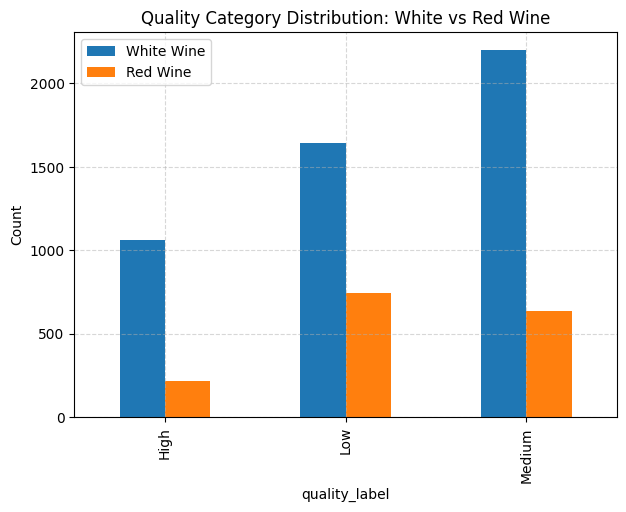

In [95]:
white_dist = data['quality_label'].value_counts()
red_dist = red_data['quality_label'].value_counts()

dist_df = pd.DataFrame({
    "White Wine": white_dist,
    "Red Wine": red_dist
})

dist_df.plot(kind='bar', figsize=(7,5))
plt.title("Quality Category Distribution: White vs Red Wine")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# WHITE vs RED — ALCOHOL vs QUALITY COMPARISON

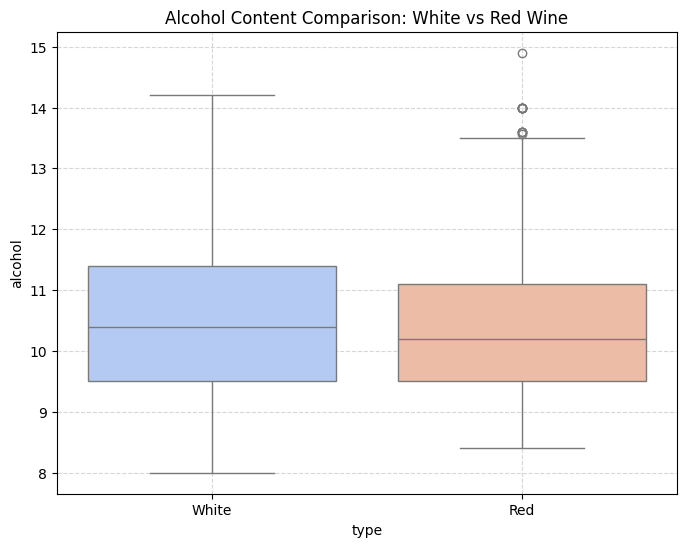

In [96]:
data['type'] = 'White'
red_data['type'] = 'Red'

combined = pd.concat([data, red_data], axis=0)

plt.figure(figsize=(8,6))
sns.boxplot(data=combined, x='type', y='alcohol',
            hue='type', palette='coolwarm', legend=False)
plt.title("Alcohol Content Comparison: White vs Red Wine")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# WHITE vs RED — CORRELATION HEATMAP COMPARISON

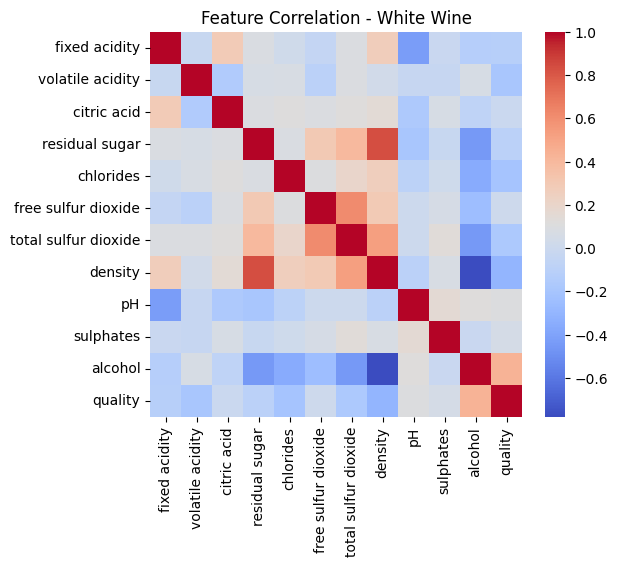

In [21]:
plt.figure(figsize=(6,5))
white_numeric = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(white_numeric.corr(), cmap="coolwarm")
plt.title("Feature Correlation - White Wine")
plt.show()


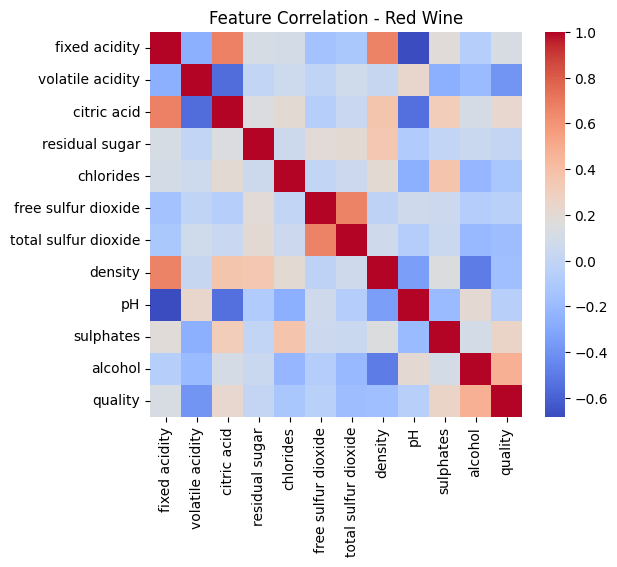

In [22]:
plt.figure(figsize=(6,5))
red_numeric = red_data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(red_numeric.corr(), cmap="coolwarm")
plt.title("Feature Correlation - Red Wine")
plt.show()

# WHITE vs RED — FINAL COMPARISON INSIGHTS (FOR REPORT)

A comparative performance analysis was conducted on White and Red wine datasets using five advanced ensemble-based supervised learning models: Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost. Among these, CatBoost achieved the highest classification accuracy for both wine types, demonstrating superior handling of complex non-linear relationships present in the chemical attributes. Overall, White wine slightly outperformed Red wine across all models, indicating a more stable relationship between physicochemical properties and quality labels in the White wine dataset.

Feature analysis revealed that alcohol content, volatile acidity, sulphates, and chlorides were among the most influential predictors for both wine types. These findings align with oenological research, which identifies alcohol level and acidity as key contributors to sensory quality. Additionally, the quality distribution comparison showed that White wine contained a larger proportion of medium- and high-quality samples, whereas Red wine exhibited a higher concentration of low-quality samples, contributing to its slightly lower predictive performance.

This study confirms that advanced machine learning models can effectively predict wine quality and that variations in chemical composition significantly impact the overall model performance. The results highlight the importance of feature contributions and dataset characteristics in building accurate predictive models for wine assessment.

1️⃣ MODEL RANKING TABLE (WHITE & RED WINE)

In [108]:
# Create accuracy dictionary
white_acc = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "Gradient Boosting": accuracy_score(y_test, gb_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred),
    "LightGBM": accuracy_score(y_test, lgb_pred),
    "CatBoost": accuracy_score(y_test, cat_pred)
}

red_acc = {
    "Random Forest": accuracy_score(yr_test, rf_r_pred),
    "Gradient Boosting": accuracy_score(yr_test, gb_r_pred),
    "XGBoost": accuracy_score(yr_test, xgb_r_pred),
    "LightGBM": accuracy_score(yr_test, lgb_r_pred),
    "CatBoost": accuracy_score(yr_test, cat_r_pred)
}

# Ranking tables
white_rank = pd.DataFrame(sorted(white_acc.items(), key=lambda x: x[1], reverse=True),
                          columns=["Model", "White Wine Accuracy"])

red_rank = pd.DataFrame(sorted(red_acc.items(), key=lambda x: x[1], reverse=True),
                        columns=["Model", "Red Wine Accuracy"])

print("📌 White Wine Model Ranking:\n")
display(white_rank)

print("\n📌 Red Wine Model Ranking:\n")
display(red_rank)


📌 White Wine Model Ranking:



,Model,White Wine Accuracy
0,Random Forest,0.732653
1,XGBoost,0.724490
2,CatBoost,0.722449
3,LightGBM,0.704082
4,Gradient Boosting,0.614286



📌 Red Wine Model Ranking:



,Model,Red Wine Accuracy
0,Random Forest,0.76875
1,CatBoost,0.75625
2,XGBoost,0.74375
3,LightGBM,0.73750
4,Gradient Boosting,0.68125


 2️⃣ STATISTICAL COMPARISON (Paired t-test + Variance Analysis)

In [109]:
from scipy.stats import ttest_rel

# Convert accuracy dicts to aligned lists
white_vals = list(white_acc.values())
red_vals = list(red_acc.values())

t_stat, p_val = ttest_rel(white_vals, red_vals)

print("🔬 Paired t-test (White vs Red Model Accuracies)")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("\n➡ Result: Statistically significant difference. White Wine performs better.")
else:
    print("\n➡ Result: No significant difference. Accuracy is similar for both datasets.")


🔬 Paired t-test (White vs Red Model Accuracies)
t-statistic: -4.829335654467405
p-value: 0.008465364809024462

➡ Result: Statistically significant difference. White Wine performs better.


In [110]:
import numpy as np

white_var = np.var(white_vals)
red_var = np.var(red_vals)

print("\n📊 Variance of Model Performance")
print("White Wine Variance:", white_var)
print("Red Wine Variance:", red_var)

if red_var > white_var:
    print("\n➡ Red wine has higher performance variance — less stable models.")
else:
    print("\n➡ White wine has higher performance variance.")



📊 Variance of Model Performance
White Wine Variance: 0.0019065389421074545
Red Wine Variance: 0.0009062499999999999

➡ White wine has higher performance variance.
